In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv.imread('messi.jpg', cv.IMREAD_GRAYSCALE)

img2 = img.copy()
template = cv.imread('ball.jpg', cv.IMREAD_GRAYSCALE)

In [3]:
w, h = template.shape[::-1]

In [4]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

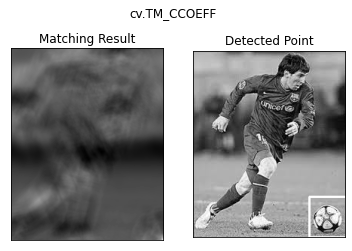

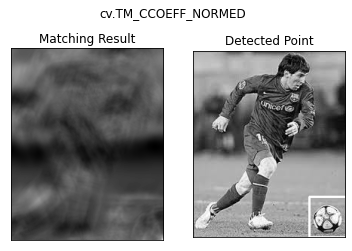

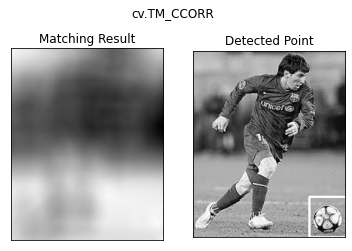

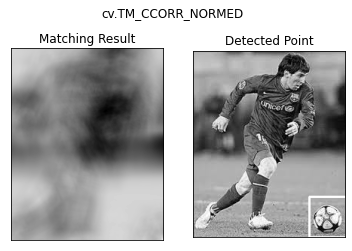

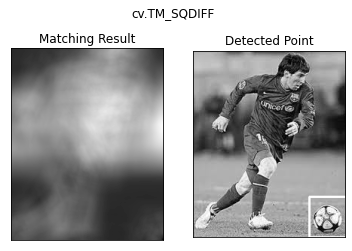

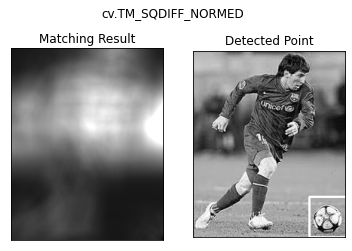

In [5]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching

    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc

    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

    plt.suptitle(meth)
    plt.show()